In [15]:
import matplotlib.pyplot as plt
import numpy as np


data = np.loadtxt('https://lectures.scientific-python.org/_downloads/087d8fe936fcb7a4762b9850b932cf9e/populations.txt')
print("year-hare-lynx-carrot")
print(data)

year-hare-lynx-carrot
[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


1. Plot of the population

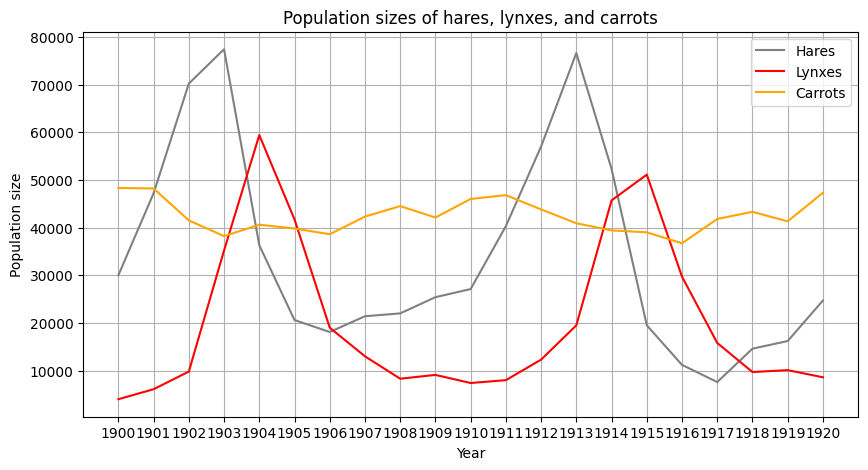

In [16]:
years, hares, lynxes, carrots = data[:, 0], data[:, 1], data[:, 2], data[:, 3]

plt.figure(figsize=(10, 5))
plt.plot(years, hares, label='Hares', color='grey')
plt.plot(years, lynxes, label='Lynxes', color='red')
plt.plot(years, carrots, label='Carrots', color='orange')
plt.xlabel('Year')
plt.ylabel('Population size')
plt.xticks(years)
plt.title('Population sizes of hares, lynxes, and carrots')
plt.legend()
plt.grid()

plt.show()

2. Showing maximums

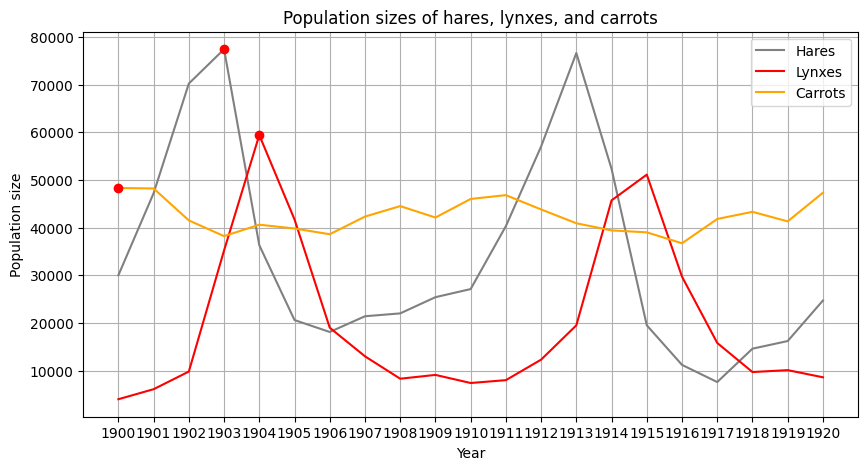

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(years, hares, label='Hares', color='grey')
plt.plot(years, lynxes, label='Lynxes', color='red')
plt.plot(years, carrots, label='Carrots', color='orange')

max_of = [years[np.argmax(i)] for i in [hares, lynxes, carrots]]

plt.scatter(max_of[0], max(hares), c = 'r', zorder=4)
plt.scatter(max_of[1], max(lynxes), c = 'r', zorder=4)
plt.scatter(max_of[2], max(carrots), c = 'r', zorder=4)
plt.xlabel('Year')
plt.ylabel('Population size')
plt.xticks(years)
plt.title('Population sizes of hares, lynxes, and carrots')
plt.legend()
plt.grid()

plt.show()

3. Ratios

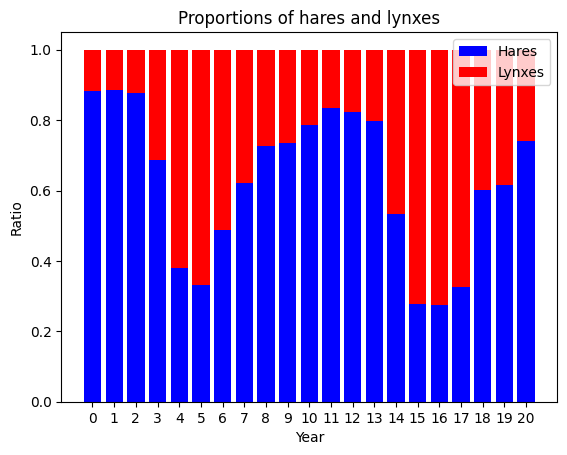

In [18]:
total = hares + lynxes
hares_ratio, lynxes_ratio = hares / total, lynxes / total

plt.bar(years-1900, hares_ratio, label='Hares', color='blue')
plt.bar(years-1900, lynxes_ratio, bottom=hares_ratio, label='Lynxes', color='red')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Proportions of hares and lynxes')
plt.xticks(years-1900)
plt.legend()
plt.show()

4. Means

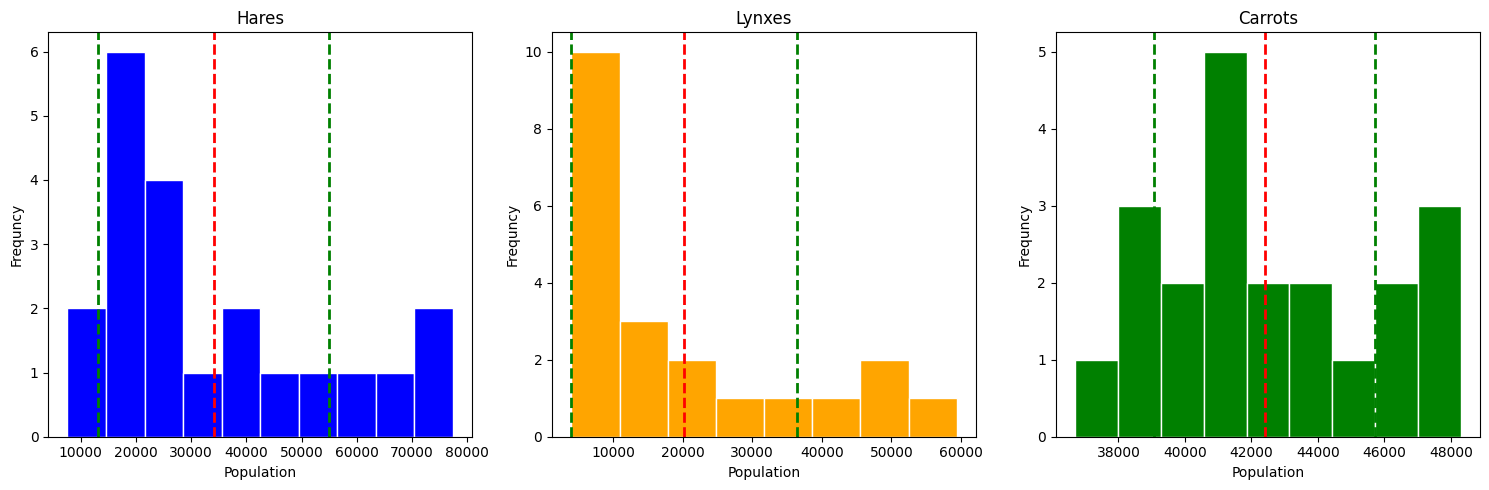

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

h_mean = np.mean(hares)
h_std = np.std(hares)
axs[0].hist(hares, bins=10, color='blue', edgecolor='white')
axs[0].axvline(h_mean, color='red', linestyle='dashed', linewidth=2)
axs[0].axvline(h_mean + h_std, color='green', linestyle='dashed', linewidth=2)
axs[0].axvline(h_mean - h_std, color='green', linestyle='dashed', linewidth=2)
axs[0].set_title('Hares')
axs[0].set_xlabel('Population')
axs[0].set_ylabel('Frequncy')

l_mean = np.mean(lynxes)
l_std = np.std(lynxes)
axs[1].hist(lynxes, bins=8, color='orange', edgecolor='white')
axs[1].axvline(l_mean, color='red', linestyle='dashed', linewidth=2)
axs[1].axvline(l_mean + l_std, color='green', linestyle='dashed', linewidth=2)
axs[1].axvline(l_mean - l_std, color='green', linestyle='dashed', linewidth=2)
axs[1].set_title('Lynxes')
axs[1].set_xlabel('Population')
axs[1].set_ylabel('Frequncy')

c_mean = np.mean(carrots)
c_std = np.std(carrots)
axs[2].hist(carrots, bins=9, color='green', edgecolor='white')
axs[2].axvline(c_mean, color='red', linestyle='dashed', linewidth=2)
axs[2].axvline(c_mean + c_std, color='green', linestyle='dashed', linewidth=2)
axs[2].axvline(c_mean - c_std, color='green', linestyle='dashed', linewidth=2)
axs[2].set_title('Carrots')
axs[2].set_xlabel('Population')
axs[2].set_ylabel('Frequncy')


plt.tight_layout()
plt.show()

5. Hares or lynxes

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


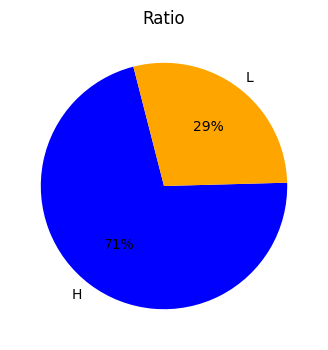

In [20]:
largest = np.fromfunction(lambda i: np.where(hares[i]>lynxes[i], 'H', 'L'), (21,), dtype = int)
print(largest)

count_H = np.count_nonzero(largest == 'H')
count_L = np.count_nonzero(largest == 'L')

plt.figure(figsize=(4, 4))
plt.pie([count_H, count_L], labels=['H', 'L'], colors=['blue', 'orange'], autopct='%1.0f%%', startangle=104.4)
plt.title('Ratio')

plt.show()

6. Correlation and changes

-0.1780136594118296


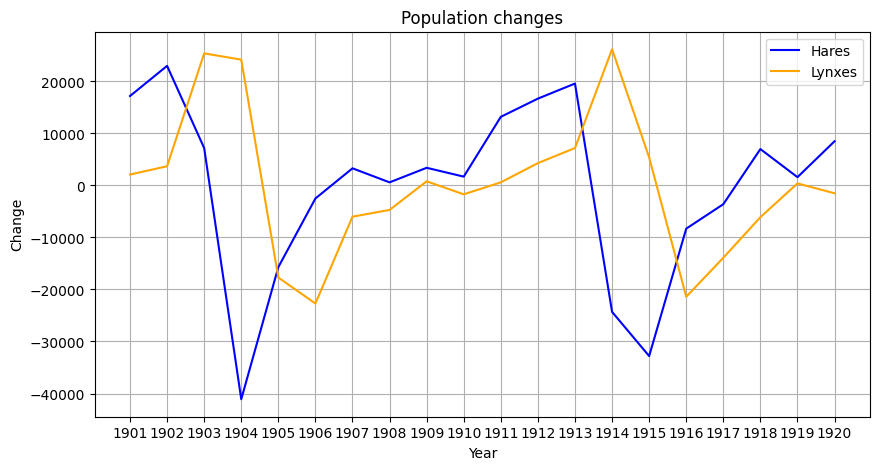

In [21]:
hares_change = np.fromfunction(lambda i: hares[i+1]-hares[i], (20,), dtype = int)
lynxes_change = np.fromfunction(lambda i: lynxes[i+1]-lynxes[i], (20,), dtype = int)
years_change = np.arange(1901,1921)

print ( np.corrcoef(hares_change,lynxes_change)[0][1] )

plt.figure(figsize=(10, 5))
plt.plot(years_change, hares_change, label='Hares', color='blue')
plt.plot(years_change, lynxes_change, label='Lynxes', color='orange')

plt.xlabel('Year')
plt.ylabel('Change')
plt.xticks(years_change)
plt.title('Population changes')
plt.legend()
plt.grid()

plt.show()


7. Scatter plot

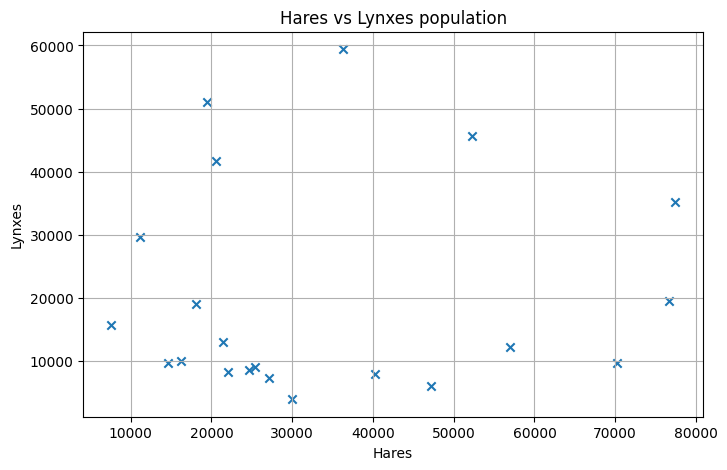

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(hares, lynxes, marker = 'x')
plt.xlabel('Hares')
plt.ylabel('Lynxes')
plt.title('Hares vs Lynxes population')
plt.grid()
plt.show()

8. Assuming

In [23]:
estimation = np.interp(1920, years[:20], hares[:20])
value = hares[years==1920]
print (estimation, (estimation - value) / value)

16200.0 [-0.34412955]
